In [ ]:
pip install scikit-learn

In [ ]:
pip install pandas

In [ ]:
pip install nltk

In [ ]:
pip install openpyxl

In [ ]:
pip install wordcloud

In [ ]:
pip install gensim

In [ ]:
pip install pyLDAvis

In [ ]:
pip install docx2txt

In [ ]:
pip install networkx

In [ ]:
pip install docx2txt

In [ ]:
pip install seaborn

In [ ]:
pip install wordcloud

In [ ]:
pip install konlpy

In [ ]:
pip install iteration_utilities

### **데이터 호출 및 전처리**

In [2]:
# 필요 라이브러리 호출
import pandas as pd
import os
import docx2txt
import re
import pandas as pd
import openpyxl
import os
import nltk
import pyLDAvis.gensim_models
import networkx as nx
import itertools

#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns


from collections import Counter
from konlpy.tag import Mecab, Kkma, Okt
from iteration_utilities import unique_everseen
from wordcloud import WordCloud
from matplotlib import font_manager, rc
from bs4 import BeautifulSoup
from tqdm import tqdm 
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models import LdaModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel


C:\Users\User\anaconda3\envs\paper\lib\site-packages\MeCab.py:15: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


In [6]:
import pandas as pd
import os
import docx2txt
from tqdm import tqdm 
tqdm.pandas()
df = pd.DataFrame()

# 읽어올 파일폴더 설정 (경로, datatype= 'docx' or 'xlsx', min_text_docx = n 문단최소글자수, min_text_xlsx = n 엑셀 최소 글자수 default == 5)
""" 
def file_process(n, dt='xlsx'):
----------------------------------------------------
n - file num
dt - data type ('xlsx', 'docx') // default == 'xlsx'
----------------------------------------------------

path_list (블로그/유튜브/인스타/트위터) + 보고서
[0~3] - 2020/2021  0:블로그 / 1: 유튜브 / 2: 인스타 / 3: 트위터
[4~7] - 2022       4:블로그 / 5: 유튜브 / 6: 인스타 / 7: 트위터
[8]   - 보고서      8: 보고서

"""

"""
1. 보고서 분석시

"""

# df = file_process(8, dt='docx', custom_dict=custom_dict)


"""

2. 소셜미디어 분석시

"""
df_blog = file_process(0, custom_dict=custom_dict)
df_yt = file_process(1, custom_dict=custom_dict)
df_insta = file_process(2, custom_dict=custom_dict)
df_twitter = file_process(3, custom_dict=custom_dict)
df = file_process(7,custom_dict=custom_dict)

df = pd.concat([df, df_blog, df_yt, df_insta, df_twitter], ignore_index=True)
df.to_excel('소셜미디어_전처리.xlsx', encoding='utf-8-sig')

Tokenization Progress: 100%|█████████████████████████████████████████████████| 19332/19332 [00:00<00:00, 118998.00it/s]
C:\Users\User\anaconda3\envs\paper\lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


In [285]:
# df.to_excel('보고서_전처리.xlsx', encoding='utf-8-sig', index=False)
df.to_excel('보고서_문장_전처리.xlsx', encoding='utf-8-sig', index=False)

C:\Users\User\anaconda3\envs\jh2\lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


In [14]:
#토큰 확인
import itertools
token_list = df['tokens'].tolist()
token_list = list(itertools.chain(*token_list))
len(token_list)
b = set(token_list)


# list3 = df['title'].tolist()
# c = set(list3)
# print(len(c))

print(len(b))

80640


### 1. 분석을 위한 기본 함수 설정

#### 1.1. 전처리 함수 설정

In [ ]:
pip install Mecab

In [3]:
import re
import pandas as pd
import openpyxl
import os
import nltk

#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

from konlpy.tag import Mecab, Kkma, Okt
from iteration_utilities import unique_everseen
from wordcloud import WordCloud
from matplotlib import font_manager, rc
from bs4 import BeautifulSoup



path_list = ['C:/Users/User/Desktop/ESG_자료/esg_텍스트/분석용/전처리 이후/블로그/2020_2021/',
             'C:/Users/User/Desktop/ESG_자료/esg_텍스트/분석용/전처리 이후/유튜브/2020_2021/',
             'C:/Users/User/Desktop/ESG_자료/esg_텍스트/분석용/전처리 이후/인스타/2020_2021/',
             'C:/Users/User/Desktop/ESG_자료/esg_텍스트/분석용/전처리 이후/트위터/2020_2021/',
             'C:/Users/User/Desktop/ESG_자료/esg_텍스트/분석용/전처리 이후/블로그/2022',
             'C:/Users/User/Desktop/ESG_자료/esg_텍스트/분석용/전처리 이후/유튜브/2022/',
             'C:/Users/User/Desktop/ESG_자료/esg_텍스트/분석용/전처리 이후/인스타/2022',
             'C:/Users/User/Desktop/ESG_자료/esg_텍스트/분석용/전처리 이후/트위터/2022/',
             'C:/Users/User/Desktop/ESG_자료/esg_텍스트/분석용/보고서/']


def file_process(n, dt='xlsx', custom_dict=None):
    # 경로설정
    path = path_list[n]

    # 결과 추출을 위한 이름 설정
    name = set_name(path)

    df = open_file(path, datatype=dt)

    tqdm.pandas(desc="Tokenization Progress")
    df['tokens'] = df['text'].progress_apply(preprocess, custom_dict=custom_dict)

    
    
    
    
    df['text'] = df['text'].progress_apply(pre_process)


    # 중복되는 df 제거
    df.drop_duplicates(subset=['text'], keep='first', inplace=True)
    df['num_tokens'] = df['tokens'].map(len)

    # 토큰값이 0인 행 제거
    df = df.loc[df['num_tokens'] != 0]

    # index 초기화
    df.reset_index(drop=True, inplace=True)
    
    return df



"""

파일 불러오기를 위한 함수 설정 

path: 경로
datatype= 'docx' or 'xlsx'
min_text_docx = n 문단최소글자수 (default == 5)
min_text_xlsx = n 엑셀 최소 글자수 (default == 5)
report_sentence = False // True로 설정 시 문장 단위 텍스트 생성

return df

"""

def open_file(path, datatype=None, min_text_docx = 5, min_text_xlsx = 5, report_sentence=False):
    pd.set_option('display.max_colwidth', None)
    files_xlsx = []
    files_docx = []

    if datatype == 'docx':
        files_docx = [file for file in os.listdir(path) if file.endswith('.docx')]
        df = pd.DataFrame()
        
        paragraphs = []
        titles = []
        
        
        if report_sentence == True:
            
            for i in range(len(files_docx)):
                file_name = path+files_docx[i]
                text = docx2txt.process(file_name)
                # doc_paragraphs = [p.strip() for p in text.split('\n'*3) if len(p.strip()) > min_text_docx]
                doc_paragraphs = [p.strip() for p in text.split('\n') if len(p.strip()) > min_text_docx]

                titles += [files_docx[i]] * len(doc_paragraphs)
                paragraphs += doc_paragraphs

            # df = pd.DataFrame(paragraphs, columns=['text'])
            df = pd.DataFrame(list(zip(titles, paragraphs)), columns=['title', 'text'])
        
        elif report_sentence == False:
            
            for i in range(len(files_docx)):
                file_name = path+files_docx[i]
                text = docx2txt.process(file_name)
                doc_paragraphs = [p.strip() for p in text.split('\n'*3) if len(p.strip()) > min_text_docx]
                titles += [files_docx[i]] * len(doc_paragraphs)
                paragraphs += doc_paragraphs

            # df = pd.DataFrame(paragraphs, columns=['text'])
            df = pd.DataFrame(list(zip(titles, paragraphs)), columns=['title', 'text'])

#         for i in range(len(files_docx)):
            
#             file_name = path+files_docx[i]
#             paragraph = docx2txt.process(file_name)
#             title = files_docx[i]
            
#             out = pd.DataFrame({'title':[title], 'text':[paragraph]})
#             df = pd.concat([df, out], ignore_index=True)
            
            
    elif datatype == 'xlsx':
        files_xlsx = [file for file in os.listdir(path) if file.endswith('.xlsx')]
        df = pd.DataFrame()
        
        if '유튜브' in path:
            for f in files_xlsx:
                file_path = os.path.join(path, f)
                
                df_title = pd.read_excel(file_path, usecols=['제목'])
                df_title = df_title.rename(columns={'제목': 'text'})   
                df_title = df_title.drop_duplicates(keep='first')

                df_text = pd.read_excel(file_path, usecols=['댓글'])
                df_text = df_text.rename(columns={'댓글': 'text'})   
                
                df = pd.concat([df, df_title, df_text], ignore_index=True)
                
#         elif '인스타' in path:
#             for f in files_xlsx:
#                 file_path = os.path.join(path, f)
                
#                 df_text = pd.read_excel(file_path, usecols=['본문'])
#                 df_text = df_text.rename(columns={'본문': 'text'})   
#                 df_text = df_text.drop_duplicates(keep='first')

#                 df_com = pd.read_excel(file_path, usecols=['댓글'])
#                 df_com = df_com.rename(columns={'댓글': 'text'})  
                
                
#                 df = pd.concat([df, df_text, df_com], ignore_index=True)

        # 댓글 각자 문서로 처리
    
        elif '인스타' in path:
            for f in files_xlsx:
                file_path = os.path.join(path, f)
                df_text = pd.read_excel(file_path, usecols=['본문'])
                df_text = df_text.rename(columns={'본문': 'text'})
                df_text = df_text.drop_duplicates(keep='first')
                df_com = pd.read_excel(file_path, usecols=['댓글'])
                df_com = df_com.rename(columns={'댓글': 'text'})
                
                # 각 댓글을 하나의 문서로 분리
                df_com['text'] = df_com['text'].str.split('/')
                df_com = df_com.explode('text')
                
                df = pd.concat([df, df_text, df_com], ignore_index=True)
                
        elif '트위터' in path:
            for f in files_xlsx:
                file_path = os.path.join(path, f)
                df_read = pd.read_excel(file_path, usecols=['text'])
                df = pd.concat([df, df_read])

        elif '블로그' in path:
            
            for f in files_xlsx:
                file_path = os.path.join(path, f)
                
                # df_title = pd.read_excel(file_path, usecols=['title'])
                # df_title = df_title.rename(columns={'title': 'text'})   
                # df_title = df_title.drop_duplicates(keep='first')

                df_text = pd.read_excel(file_path, usecols=['text'])
                df = pd.concat([df, df_text], ignore_index=True)

                # df = pd.concat([df, df_title, df_text], ignore_index=True)
                
                

    return df.dropna()

# 형태소 분석을 위한 객체 생성
mecab = Mecab(dicpath='c:/mecab/mecab-ko-dic')

# 1차 전처리 (한글 이외에 모든 텍스트 제거)
def pre_process(text):
    
    pr_text = re.sub(r"[^ㄱ-ㅣ가-힣\s]+|[ㄱ-ㅎㅏ-ㅣ]+", "", text)
    pr_text = re.sub('\\<br\\>',' ',pr_text)
    pr_text = re.sub(r'\s+', ' ', pr_text, flags=re.I)
    pr_text = pr_text.replace("\n", "")
    pr_text = pr_text.strip()
    return pr_text

# 2차 전처리 mecab을 통한 형태소 분석
def analyzer_pos(text, custom_dict):
    tokens = mecab.pos(text)
    # tokens = [ s for s, t in tokens if t in ['XR', 'VV', 'VA', 'NNG', 'NNP'] and len(s) > 1 and s not in stop_word] 
    tokens = [ s for s, t in tokens if t in ['VV', 'VA', 'NNG', 'NNP'] and len(s) > 1 and s not in stop_word] # 동사, 형용사, 명사 중 2글자 이상 + 불용어를 제외함


    # 원하는 단어가 끊여져서 나올경우(우선순위 설정 이후) 합치기
    i = 0
    new_tokens = []

    while i < len(tokens):
        if i == len(tokens) - 1:
            new_tokens.append(tokens[i])
            break
        current_token = tokens[i]
        next_token = tokens[i+1]
        if current_token+next_token in custom_dict:
            new_tokens.append(current_token+next_token)         
            i += 2
        else:
            new_tokens.append(current_token)
            i += 1
    return new_tokens

    


def set_name(path):
    name = ''
    
    if '보고서' in path:
        name = '보고서'

    elif '인스타' in path:
        name = '인스타'

    elif '블로그' in path:
        name = '블로그'

    elif '트위터' in path:
        name = '트위터'

    elif '유튜브' in path:
        name = '유튜브'
    
    return name




#### 1.2. 빈도분석 워드클라우드

In [4]:
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt

"""
텍스트를 입력받아 사용자 정의 사전을 기반으로 정규표현식 기반 전처리, mecab 형태소 분석을 진행

"""

def preprocess(text, custom_dict=None):
    
    # 정규표현식 처리
    text = pre_process(text)
    
    # mecab 전처리
    tokens = analyzer_pos(text, custom_dict)
    # tokens = ", ".join(tokens)

    return tokens



"""
단어의 빈도수를 계산하여 판다스 df 형태로 변환

"""

def count_words(df, column='tokens', preprocess=None, min_freq=2):
    
    # 토근 처리 및 counter upadate
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
        
    # counter 생성 및 데이터 update
    counter = Counter()
    df[column].map(update)
    
    # counter를 df로 변환
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['빈도'])
    freq_df = freq_df.query('빈도 >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('빈도', ascending=False)


"""
워드 클라우드 생성

"""

def wordcloud(path, name, word_freq, title=None, max_words=100, stopwords=None):
    
    # 워드 클라우드 기본 세팅
    wc = WordCloud(
                    font_path = path,
                    max_font_size=120,
                    width = 800,
                    height = 400,
                    background_color ='white',
                    # colormap = 'Paired',
                    max_words=max_words)
    
    # df를 dic으로 변경
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq
        
    # 불용어 필터링
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items()
                              if token not in stopwords}
    
    wc.generate_from_frequencies(counter)
    
    
    plt.title(title, fontsize=15, fontweight='bold')
    plt.axis("off")
    plt.imshow(wc, interpolation='bilinear')
    plt.savefig(name + '_워드클라우드.png')
    plt.show()

### 2. 단어사전 설정

#### 2-1. 사용자 단어사전 추가

In [8]:
pip install jamo

  Using cached jamo-0.4.1-py3-none-any.whl (9.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [41]:
# 사용자 단어사전 추가
from jamo import h2j, j2hcj

def get_jongsung_TF(sample_text):
    sample_text_list = list(sample_text)
    last_word = sample_text_list[-1]
    last_word_jamo_list = list(j2hcj(h2j(last_word)))
    last_jamo = last_word_jamo_list[-1]

    jongsung_TF = "T"

    if last_jamo in ['ㅏ', 'ㅑ', 'ㅓ', 'ㅕ', 'ㅗ', 'ㅛ', 'ㅜ', 'ㅠ', 'ㅡ', 'ㅣ', 'ㅘ', 'ㅚ', 'ㅙ', 'ㅝ', 'ㅞ', 'ㅢ', 'ㅐ,ㅔ', 'ㅟ', 'ㅖ', 'ㅒ']:
        jongsung_TF = "F"

    return jongsung_TF


with open("C:\\mecab\\user-dic\\nnp.csv", 'r', encoding='utf-8') as f:
  file_data = f.readlines()

#---------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------

# word_list =  ['플랫폼', '지속가능성', '지속가능', '이해관계자', '재생에너지', '신재생에너지', '지속가능경영', '지속가능보고서', '지속가능경영보고서', '협력사', '사외이사', '리사이클링', '기후변화',
#               '게임체인저', '동반성장', '이사회', '밸류체인', '가치사슬', '임직원', '고부가', '뉴스레터', '이산화탄소', '유연근무', '언택트', '이노베이션', '정보보호', '이행원칙', '노사협의회',
#               '경기주택공사', '게임', '업계', '스토리', '제로웨이스트', '어쩌고', '어쩌구', '세미나', '확대', '기여', '택소노미', '차별화', '그린워싱', '장애인', '의무화', '배당귀족', '설명회', '스트레스', '인트라넷', '리사이클링',
#               '요구사항', '무공해', '입사자', '포트폴리오', '태스크포스', '떠오르', '프로그래머', '휠체어', '주도적', '스터디', '배송', '마이너스', '스타벅스', '응원', '마이너스', '선포식', '아이콘',
#               '중요성', '필요성','선포', '이벤트', '폴리에스테르']
word_list = ['자소서']

#---------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------

for word in word_list:
  jongsung_TF = get_jongsung_TF(word)

  line = '{},,,,NNP,*,{},{},*,*,*,*,*\n'.format(word, jongsung_TF, word)

  file_data.append(line)

with open("C:\\mecab\\user-dic\\nnp.csv", 'w', encoding='utf-8') as f:
  for line in file_data:
    f.write(line)

In [4]:
# 원하는 만큼 제거
with open("C:\\mecab\\user-dic\\nnp.csv", 'r', encoding='utf-8') as f:
    # Read the contents of the file
    lines = f.readlines()

# Remove the last 3 lines
# lines = lines[:2]

# Open the file for writing and save the modified contents
with open("C:\\mecab\\user-dic\\nnp.csv", 'w', encoding='utf-8') as f:
    f.writelines(lines)

In [42]:
# 단어사전 확인
with open("C:\\mecab\\user-dic\\nnp.csv", 'r', encoding='utf-8') as f: 
    file_data = f.readlines()
file_data

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,,,,NNP,*,T,구글,*,*,*,*,*\n',
 '플랫폼,,,,NNP,*,T,플랫폼,*,*,*,*,*\n',
 '지속가능성,,,,NNP,*,T,지속가능성,*,*,*,*,*\n',
 '지속가능,,,,NNP,*,T,지속가능,*,*,*,*,*\n',
 '이해관계자,,,,NNP,*,F,이해관계자,*,*,*,*,*\n',
 '재생에너지,,,,NNP,*,F,재생에너지,*,*,*,*,*\n',
 '신재생에너지,,,,NNP,*,F,신재생에너지,*,*,*,*,*\n',
 '지속가능경영,,,,NNP,*,T,지속가능경영,*,*,*,*,*\n',
 '지속가능보고서,,,,NNP,*,F,지속가능보고서,*,*,*,*,*\n',
 '지속가능경영보고서,,,,NNP,*,F,지속가능경영보고서,*,*,*,*,*\n',
 '협력사,,,,NNP,*,F,협력사,*,*,*,*,*\n',
 '사외이사,,,,NNP,*,F,사외이사,*,*,*,*,*\n',
 '리사이클링,,,,NNP,*,T,리사이클링,*,*,*,*,*\n',
 '기후변화,,,,NNP,*,F,기후변화,*,*,*,*,*\n',
 '게임체인저,,,,NNP,*,F,게임체인저,*,*,*,*,*\n',
 '동반성장,,,,NNP,*,T,동반성장,*,*,*,*,*\n',
 '이사회,,,,NNP,*,F,이사회,*,*,*,*,*\n',
 '밸류체인,,,,NNP,*,T,밸류체인,*,*,*,*,*\n',
 '가치사슬,,,,NNP,*,T,가치사슬,*,*,*,*,*\n',
 '임직원,,,,NNP,*,T,임직원,*,*,*,*,*\n',
 '고부가,,,,NNP,*,F,고부가,*,*,*,*,*\n',
 '뉴스레터,,,,NNP,*,F,뉴스레터,*,*,*,*,*\n',
 '이산화탄소,,,,NNP,*,F,이산화탄소,*,*,*,*,*\n',
 '유연근무,,,,NNP,*,F,유연근무,*,*,*,*,*\n',
 '언택트,,,,NNP,*,F,언택트,*,*,*,*,*\n',
 '이노베이션,,,,NNP,*,T,이노베

#### 2-2. 우선순위 설정

In [1]:
# 우선순위 확인
with open("c:/mecab/mecab-ko-dic/user-nnp.csv", 'r', encoding='utf-8') as f: 
    file_data = f.readlines()
file_data

['대우,1786,3545,3821,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,1786,3546,2953,NNP,*,T,구글,*,*,*,*,*\n',
 '플랫폼,1786,3546,2940,NNP,*,T,플랫폼,*,*,*,*,*\n',
 '지속가능성,1786,3546,2953,NNP,*,T,지속가능성,*,*,*,*,*\n',
 '지속가능,1786,3546,2953,NNP,*,T,지속가능,*,*,*,*,*\n',
 '이해관계자,1786,3545,2468,NNP,*,F,이해관계자,*,*,*,*,*\n',
 '재생에너지,1786,3545,2953,NNP,*,F,재생에너지,*,*,*,*,*\n',
 '신재생에너지,1786,3545,2953,NNP,*,F,신재생에너지,*,*,*,*,*\n',
 '지속가능경영,1786,3546,2953,NNP,*,T,지속가능경영,*,*,*,*,*\n',
 '지속가능보고서,1786,3545,2953,NNP,*,F,지속가능보고서,*,*,*,*,*\n',
 '지속가능경영보고서,1786,3545,2953,NNP,*,F,지속가능경영보고서,*,*,*,*,*\n',
 '협력사,1786,3545,2953,NNP,*,F,협력사,*,*,*,*,*\n',
 '사외이사,1786,3545,2953,NNP,*,F,사외이사,*,*,*,*,*\n',
 '리사이클링,1786,3546,2953,NNP,*,T,리사이클링,*,*,*,*,*\n',
 '기후변화,1786,3545,2953,NNP,*,F,기후변화,*,*,*,*,*\n',
 '게임체인저,1786,3545,2953,NNP,*,F,게임체인저,*,*,*,*,*\n',
 '동반성장,1786,3546,2953,NNP,*,T,동반성장,*,*,*,*,*\n',
 '이사회,1786,3545,2845,NNP,*,F,이사회,*,*,*,*,*\n',
 '밸류체인,1786,3546,2953,NNP,*,T,밸류체인,*,*,*,*,*\n',
 '가치사슬,1786,3546,2953,NNP,*,T,가치사슬,*,*,*,*,*\n',


In [2]:
# 우선순위 설정
file_data[2] ='플랫폼,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[3] ='지속가능성,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[4] ='지속가능,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n' 
file_data[5] ='이해관계자,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n' 
file_data[6] ='재생에너지,1786,3545,1,NNP,*,F,더빙,*,*,*,*,*\n' 
file_data[7] ='신재생에너지,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[8] ='지속가능경영,1786,3545,1,NNP,*,F,더빙,*,*,*,*,*\n' 
file_data[9] ='지속가능보고서,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n' 
file_data[10] ='지속가능경영보고서,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[11] ='협력사,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n' 
file_data[12] ='사외이사,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n' 
file_data[13] ='리사이클링,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n' 
file_data[14] ='기후변화,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n' 
file_data[15] ='게임체인저,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n'  
file_data[16] ='동반성장,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n' 
file_data[17] ='이사회,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[18] ='밸류체인,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n' 
file_data[19] ='가치사슬,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n' 
file_data[20] ='임직원,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n' 
file_data[21] ='고부가,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n' 
file_data[22] ='뉴스레터,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'  
file_data[23] ='이산화탄소,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n' 
file_data[24] ='유연근무,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[25] ='언택트,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n' 
file_data[26] ='이노베이션,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[27] ='정보보호,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[28] ='이행원칙,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n' 
file_data[29] ='노사협의회,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[30] ='경기주택공사,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[31] ='게임,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[32] ='업계,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[33] ='스토리,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[34] ='제로웨이스트,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[35] ='어쩌고,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[36] ='어쩌구,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[37] ='세미나,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[38] ='확대,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[39] ='기여,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[40] ='택소노미,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[41] ='차별화,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[42] ='그린워싱,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[43] ='장애인,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[44] ='의무화,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[45] ='배당귀족,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[46] ='설명회,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[47] ='스트레스,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[48] ='인트라넷,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[49] ='리사이클링,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[50] ='요구사항,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[51] ='무공해,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[52] ='입사자,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[53] ='포트폴리오,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[54] ='태스크포스,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[55] ='떠오르,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[56] ='프로그래머,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[57] ='휠체어,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[58] ='주도적,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[59] ='스터디,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[60] ='배송,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[61] ='마이너스,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[62] ='스타벅스,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[63] ='응원,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[64] ='마이너스,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[65] ='선포식,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[66] ='아이콘,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[67] ='중요성,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[68] ='필요성,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[69] ='선포,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[70] ='이벤트,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[71] ='폴리에스테르,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'
file_data[71] ='자소서,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n'

with open("c:/mecab/mecab-ko-dic/user-nnp.csv", 'w', encoding='utf-8') as f: 
    for line in file_data: 
        f.write(line)

# 변경된 내용 확인
with open("c:/mecab/mecab-ko-dic/user-nnp.csv", 'r', encoding='utf-8') as f: 
    file_data = f.readlines()
file_data

['대우,1786,3545,3821,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,1786,3546,2953,NNP,*,T,구글,*,*,*,*,*\n',
 '플랫폼,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n',
 '지속가능성,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n',
 '지속가능,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n',
 '이해관계자,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n',
 '재생에너지,1786,3545,1,NNP,*,F,더빙,*,*,*,*,*\n',
 '신재생에너지,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n',
 '지속가능경영,1786,3545,1,NNP,*,F,더빙,*,*,*,*,*\n',
 '지속가능보고서,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n',
 '지속가능경영보고서,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n',
 '협력사,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n',
 '사외이사,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n',
 '리사이클링,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n',
 '기후변화,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n',
 '게임체인저,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n',
 '동반성장,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n',
 '이사회,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n',
 '밸류체인,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n',
 '가치사슬,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n',
 '임직원,1786,3546,0,NNP,*,F,더빙,*,*,*,*,*\n',
 '고부가,1786,3545,0,NNP,*,F,더빙,*,*,*,*,*\n',
 '뉴스레터,1786,3545,0

#### *********  불용어 사전 *********

In [ ]:
# 불용어
# 길호현. (2018). 텍스트마이닝을 위한 한국어 불용어 목록 연구. 우리말글, 78, 1-25.

with open("stop.txt", "r", encoding="utf8") as f:
    stop_word = []
    stop_text = [stop_word.extend(line.strip().split(", ")) for line in f]


# df_stop3 = pd.read_excel('stop3.xlsx')
# stop_word_jh3 = df_stop3['text'].tolist()
# print(stop_word_jh3)

df_stop4 = pd.read_excel('stop_social.xlsx')
stop_word_jh4 = df_stop4['text'].tolist()
# print(stop_word_jh4)
    
# with open("stop2.txt", "r", encoding="utf8") as f:
#     stop_word2 = []
#     stop_text2 = [stop_word2.extend(line.strip().split(", ")) for line in f]
# print(stop_word2)

# 개인 전처리를 위한 stop_word 설정
stop_word_jh = ['최태원', '디스클로저', '외신', '출처', '한국', '뉴스', '최초', '공개', '단독', '회사', '상장', '보도', '글로벌', '발행', '래퍼', '출연', '리뷰', '중앙일보', '기자', '이낙연',
                '디렉', '명상', '회장', '신문', '나라', '블로그', '코리아', '미국', '중국', '관련', '대한민국', '대리석', '타임스', '무디스', '법무법인', '변호사', '교수', '기업',
                '타임즈', '인더스', '트리', '습니다', '에서', '속도', '한다', '이승기', '방위대', '일본', '는데', '으로', '처럼', '호남', '야구', '위한', '면서', '지만', '에게', '천억', '투데이', '해요', '펭귄', '팝콘',
                '북마크', '네이버', '네슬레', '자칭', '네요', '코엑스', '노스페이스', '홈페이지', '어야', '전라', '전북', '매일신문', '감사', '영상', '만들', '방송', '슈카', '오늘', '배우', '세상', '사람',
                '다니', '애플', '나오', '삼전', '민주당', '선생', '선수', '이번', '마찬가지', '그동안', '동원', '참치', '맛있', '한화', '그룹', '문재인', '래원', '노래', '좌파', '휠라', '기판',
                '하이닉스', '한미', '입니다', '게임', '넷마블', '삼성', '시멘트', '조선', '백화점', '약품', '의약품', '해양', '효성', '렌탈', '울산', '자동차', '그램', '정답',
                '빅이슈', '삼양', '두부', '부면', '포스코', '하림', '비빔면', '상공', '도시락', '스타', '미주', '라무', '유한', '킴벌리', '농협', '모델', '프로', '아거', '연지', '김병만',
                '떨채', '리비', '프로', '퀴즈', '경기주택공사', '경기', '주택', '공사', '진분', '테슬라', '교보생명', '푸르', '서울', '공단', '삼성전자', '부문', '카카오', '데일리', '임팩트',
                '국내', '시사', '센터', '앨범', '지디', '엔터', '부산', '연구원', '이벤트', '출장', '박스', '안치용', '슈가버블', '배민', '산불', '피해', '클릭', '지수', '하이브', '호비', '경기도',
                '래리', '핑크', '기사', '링크', '윤석열', '생각', '케어', '오전', '오후', '제주', '가능', '내용', '경우', '정도', '소개', '대표', '언서', '학교', '대학교', '학생', '사진', '사용', '현대',
                '원문']

stop_word_jh2 = ['토끼', '트레저', '센트', '파리바', '마을금고', '하이트진로', '꿀벌', '부영', '전남', '아이돌', '주니어', '로봇', '요약', '사단법인', '돌아가', '멜론', '한눈', '버핏', '셋톱박스',
                  '우편물', '현태캐피탈,', '목소리', '인사이드', '포유', '여대', '롯데제과', '김치', '대하', '홍은택', '동네', '소프트', '윤종규', '산업은행', '윤종규', '동부', '한화투자증권', '머리',
                  '이러', '조현준', '썸머', '구내식당', '포항,', '유한양행', '제클린', '국민카드', '대우건설', '구미', '스타일', '박옥', '에버', '부천', '랜드', '프리', '선대', '아산', '한국지역난방',
                  '테일', '이미주', '디자인', '풀무원', '매경', '롯데케미칼', '컬러,', '현대로템', '포항시', '남형', '현산', '아뉴스', '중기', '뉴스룸', '인더', '전시', '부산시', '일보', '국민은행',
                  '성동구', '에듀', '동안', '민회', '대선', '적십자사', '수협', '진원', '파크', '한화건설', '텔레콤,', '지사', '데이', '크리에이터', '해남', '공원', '유머', '여수', '롯데카드', '케이',
                  '특집', '현대제철', '모건', '글라스', '마사회', '인덱스', '아시아나항공', '텍스', '리더스', '파이낸셜', '스테이', '두산,', '하우', '전주시', '한국거래소', '국마', '계룡', '대한상의',
                  '골드', '신보', '항만', '미스트', '인천공항공사', '포카', '한경', '우리금융그룹', '단백질', '축구', '제일제당', '트위터', '주세요', '파우,', '건국대', '코카', '이주현', '최중현', '중부',
                  '퍼시픽', '연합회', '슈나이더', '드리', '코노', '아모레', '청인', '손잡', '해남군', '원장', '안랩', '로직스', '알리', '산학', '버튼', '노컷뉴스', '워크', '수력', '이제', '포스코건설,',
                  '다회', '시립', '월드', '홍보', '박사', '강동완', '태승', '이타임즈', '강원도', '코람코', '석화', '신용보증기금', '남양주', '데모', '독스', '헬스', '용가리동아', '인수위', '그러', '이마트',
                  '일렉트릭', '조원', '은행장,', '위아', '알아보', '코레', '홈플러스', '바디스', '이윤진', '닷컴', '위메이드', '전경련', '맥주', '고은정', '스리랑카', '그렇', '신지현', '이노', '끝내',
                  '캠프', '회차', '안동', '레포트', '지오', '헤럴드', '유업', '이카', '진천', '단심', '피플', '고배', '출판사', '퇴계원', '엡손', '광명시', '난지', '아줌마', '주간경향', '버티',
                  '달수', '아빠', '언론사', '특별시', '차기', '대상', '브레이크', '제회', '플러스', '후계자', '골프', '연예', '인천', '무료', '러시아', '의원', '수원', '서부', '이종현', '준원', '케미',
                  '지회', '강자', '남양주시', '비즈', '손해', '연합뉴스', '김주현', '피니언', '대전', '실시간', '스포츠', '공모전', '산림', '농업', '임업', '통하']


stop_word.extend(stop_word_jh)
stop_word.extend(stop_word_jh2)
# stop_word.extend(stop_word_jh3)
stop_word.extend(stop_word_jh4)

print(stop_word)
print(len(stop_word))

custom_dict = ['지속가능', '이해관계자', '탄소중립', '신재생에너지', '재생에너지', '탄소중립', '탄소제로', '메타버스', '지배구조', '지속가능보고서', '지속가능경영보고서', '사외이사',
               '이상기후', '기후변화', '게임체인저', '동반성장', '고부가가치', '협력사', '가치사슬', '밸류체인', '유연근무', '정보보호', '이행원칙', '노사협의회', '위드코로나', '제로웨이스트',
               '제로웨이스트', '위드코로나', '암호화폐', '그린워싱', '배당귀족', '업무공간', '태스크포스', '라이프사이클', '라이프스타일']


In [74]:
len(stop_word_jh)

134

#### *********  토큰 수정 *********

In [7]:
#df['tokens'] = df['tokens'].apply(lambda x: [i.replace('밸류체인', '가치사슬') for i in x])

df['tokens'] = df['tokens'].apply(lambda x: [re.sub(r'\b이동과\b', '이동과정', i) for i in x])
df['tokens'] = df['tokens'].apply(lambda x: [re.sub(r'\b벨류체인\b', '가치사슬', i) for i in x])
df['tokens'] = df['tokens'].apply(lambda x: [re.sub(r'\b어쩌고\b', '어쩌구', i) for i in x])
df['tokens'] = df['tokens'].apply(lambda x: [re.sub(r'\b어떻\b', '어떻게', i) for i in x])
df['tokens'] = df['tokens'].apply(lambda x: [re.sub(r'\b힘드\b', '힘들다', i) for i in x])
df['tokens'] = df['tokens'].apply(lambda x: [re.sub(r'\b만드\b', '만들다', i) for i in x])
df['tokens'] = df['tokens'].apply(lambda x: [re.sub(r'\b외이\b', '사외이사', i) for i in x])
df['tokens'] = df['tokens'].apply(lambda x: [re.sub(r'\b줄어드\b', '줄어들다', i) for i in x])
df['tokens'] = df['tokens'].apply(lambda x: [re.sub(r'\b폴리\b', '포트폴리오', i) for i in x])
df['tokens'] = df['tokens'].apply(lambda x: [re.sub(r'\b스며드\b', '스며들다', i) for i in x])
df['tokens'] = df['tokens'].apply(lambda x: [re.sub(r'\b역쉬\b', '역시', i) for i in x])
df['tokens'] = df['tokens'].apply(lambda x: [re.sub(r'\b달려가\b', '달리', i) for i in x])
df['tokens'] = df['tokens'].apply(lambda x: [re.sub(r'\b벤트\b', '이벤트', i) for i in x])
df['tokens'] = df['tokens'].apply(lambda x: [re.sub(r'\b이쁘\b', '예쁘', i) for i in x])
df['tokens'] = df['tokens'].apply(lambda x: [re.sub(r'\b더불\b', '더불어', i) for i in x])
df['tokens'] = df['tokens'].apply(lambda x: [re.sub(r'\b앞장\b', '앞장서다', i) for i in x])
df['tokens'] = df['tokens'].apply(lambda x: [re.sub(r'\b가즈\b', '가자', i) for i in x])






# 대상 단어들
da_list = ['모르', '빠르', '재밌', '미치', '대하', '보내', '바라보', '떨어지', '떠오르', '지키', '힘들', '모르', '맞추', '이끌', '구하', '낮추', '없애', '따지', '애쓰', '커지', '늘리', '키우',
           '살리', '앞두', '내려놓', '따라가', '바꾸', '거듭나', '이롭', '바꾸', '기쁘', '지나치', '즐겁', '머물', '바라', '변하', '선보이', '떠오르', '불붙', '안타깝', '잊어버리', '빠지',
           '무겁', '어이없', '어울리', '부끄럽', '웃기', '가져가', '멋지', '땡기,' '뜻깊', '예쁘', '재미있', '들어오', '찾아오', '늘어놓', '꺼지', '끝나', '두렵', '만나', '채우', '띄우', '생각나', '부드럽',
           '걸어다니', '힘쓰', '돌리', '나타나', '흘리', '찾아보', '가져오', '챙기', '지켜보', '넘치', '놀라', '누리', '갈아입', '향하', '버리', '멋있', '고맙', '귀하', '반갑', '편하', '보태', '돌보', '알아듣',
           '똑같', '착하', '흔들리', '알차', '슬프', '흐르', '떠들', '끌리', '뜻깊', '보이', '달려가', '알아듣', '꿈꾸', '질리', '달리', '물려주', '거세', '괜찮', '땡기', '과하', '어렵', '즐기', '논하', 
           '줄이', '탐나', '따르', '들어가', '바뀌', '다르', '오르', '나서', '나누', '새롭', '기다리', '살아가', '인정받', '일어나', '늘어나', '앞장서', '전하', '힘내', '생기', '이루', '살펴보다', '남기',
           '본격화하', '내놓', '이르', '바쁘', '귀엽']


# 데이터프레임의 'tokens' 열에 적용할 함수
def replace_word_with_da(word):
    if word in da_list:
        return word + '다'
    else:
        return word

# 데이터프레임에 함수 적용하기
df['tokens'] = df['tokens'].apply(lambda x: [replace_word_with_da(word) for word in x])

### 2. 텍스트 분석

#### 2-1. 빈도분석

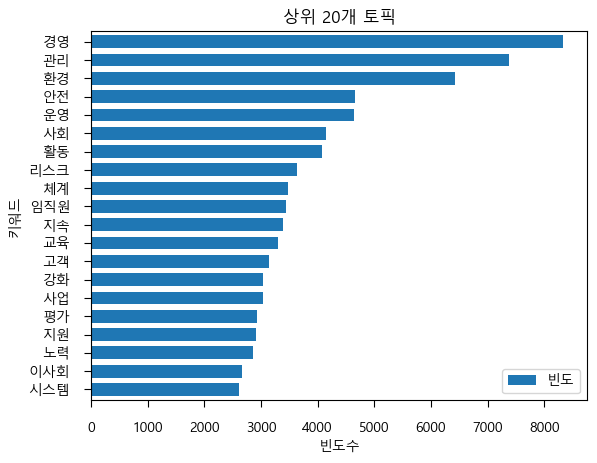

In [15]:
"""

빈도분석

"""

a = count_words(df)

# Colab 의 한글 폰트 설정
plt.rc('font', family='Malgun Gothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)


ax = a.head(20).plot(kind='barh', width=0.7)
ax.invert_yaxis()
ax.set(xlabel='빈도수', ylabel='키워드', title='상위 20개 토픽')
ax.tick_params(axis='x', which='major', pad=10, length=5, labelsize=10)
ax.tick_params(axis='y', which='major', pad=10, length=5, labelsize=10)
ax.title.set_fontsize(12) # 제목 폰트 크기 조절
# ax.figure.savefig('2020_2021_'+name+'_빈도분석.png')

#### 2.2. 워드클라우드

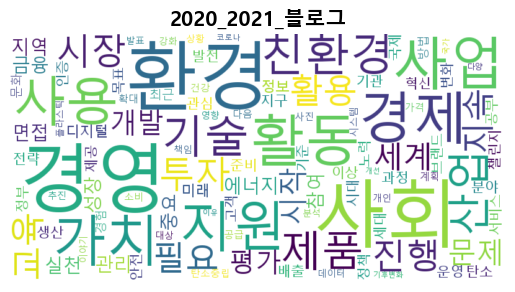

In [93]:
"""

워드 클라우드 생성

"""
import warnings
warnings.filterwarnings('ignore')

# 폰트경로
# path = '/usr/share/fonts/truetype/nanum/MalgunGothicc.ttf'  -- 코랩용
# wordcloud(path, word_freq, title=None, max_words=100, stopwords=None)
path = 'C:/Windows/Fonts/malgun.ttf'
wordcloud(path, name, a['빈도'], title='2020_2021_'+name)


#### 2.3. TF-IDF

In [8]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel


# 토큰화된 자료를 불러와 딕셔너리 생성
gensim_paragraphs = df['tokens']
dict_gensim_para = Dictionary(gensim_paragraphs)

# 문서의 빈도수 및 등장 문서 개수 설정
dict_gensim_para.filter_extremes(no_below=20, no_above=0.6)

## 사전 index 확인
# dict_gensim_para.token2id

# corpus(= BOW)
bow_gensim_para = [dict_gensim_para.doc2bow(paragraph) for paragraph in gensim_paragraphs]
# bow_gensim_para


#TF-IDF 생성
tfid_gensim_para = TfidfModel(bow_gensim_para)           # 가방 모델
vectors_gensim_para = tfid_gensim_para[bow_gensim_para]  # 가중치


# # 단어별 가중치를 dictionary 형태로 변환(for wordcloud)
# word_weights = {}
# for doc in vectors_gensim_para:
#     for word_id, weight in doc:
#         word = dict_gensim_para[word_id]
#         word_weights[word] = weight

In [9]:
# tf-idf 합산을 위한 pandas seires 객체 생성
word_tfidf_sum = pd.Series(index=dict_gensim_para.token2id.keys())

for i, doc in enumerate(vectors_gensim_para):
    
    for word_id, value in doc:
        word = dict_gensim_para[word_id]
        
        if pd.isna(word_tfidf_sum[word]):
            word_tfidf_sum[word] = value
        else:
            word_tfidf_sum[word] += value

print(word_tfidf_sum)

C:\Users\User\AppData\Local\Temp\ipykernel_4476\1085664700.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  word_tfidf_sum = pd.Series(index=dict_gensim_para.token2id.keys())


경영     1858.463303
구역       27.451115
문화      246.964955
실천      953.074962
재단      158.420890
          ...     
조원희      10.747336
야다       31.285205
자량       14.029432
정진흥       3.385859
양한빈      12.021951
Length: 13966, dtype: float64


In [10]:
# 엑셀 생성을 위해 df로 변환

df_tfidf = word_tfidf_sum.to_frame(name='tfidf_sum')

# index 재설정
df_tfidf = df_tfidf.reset_index()
# df_tfidf = df_tfidf.rename(columns={'index': 'word'})   


df_tfidf.columns = ['word', 'tfidf_sum']
df_tfidf = df_tfidf.sort_values('tfidf_sum', ascending=False)
df_tfidf.to_excel('tfidf_sum.xlsx', index=False)

df_tfidf

,word,tfidf_sum
0,경영,1858.463303
42,환경,1235.641429
246,투자,1207.433802
56,사회,1152.425206
625,참여,1108.432553
...,...,...
13773,임무상,0.895029
13831,변기영,0.863414
13827,김영일,0.846752
11558,명관,0.835067


### 3. 토픽모델링

### **파일 불러오기**

In [ ]:
import pandas  as pd
import ast

"""
데이터 호출 & 전처리 결과 호출

"""

df= pd.read_excel('소셜미디어_전처리.xlsx', dtype={'tokens': list})
df['tokens'] = df['tokens'].apply(lambda x: ast.literal_eval(x))

#### 3.1. LDA(by gensim)

In [31]:
import itertools
token_list = df['tokens'].tolist()
token_list = list(itertools.chain(*token_list))
len(token_list)
b = set(token_list)
print(len(b))

12110


##### 3.1.1 lda 모델

In [23]:
## lda 자동 저장
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models import LdaModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim_models

def show_topic(lda_model, num_topics, num_words):
    topics = lda_model.show_topics(num_topics=num_topics, num_words=num_words, formatted=False)
    topics_words = [(tp[0], [wd[0] for wd in tp[1]], [round(wd[1], 3) for wd in tp[1]]) for tp in topics]
    df = pd.DataFrame(topics_words, columns=['Topic', 'Word', 'Weight'])
    return df

def LDA_process(below_num, above_num, topic_num, dtype):
    
    # 토큰화된 자료를 불러와 딕셔너리 생성
    gensim_paragraphs = df['tokens']
    dict_gensim_para = Dictionary(gensim_paragraphs)

    # 문서의 빈도수 및 등장 문서 개수 설정
    dict_gensim_para.filter_extremes(no_below=below_num, no_above=above_num)

    ## 사전 index 확인
    # dict_gensim_para.token2id

    # corpus(= BOW)
    bow_gensim_para = [dict_gensim_para.doc2bow(paragraph) for paragraph in gensim_paragraphs]
    # bow_gensim_para


    #TF-IDF 생성
    tfid_gensim_para = TfidfModel(bow_gensim_para)           # 가방 모델
    vectors_gensim_para = tfid_gensim_para[bow_gensim_para]  # 가중치
    
    
    lda_model = LdaMulticore(corpus = bow_gensim_para,
                             id2word = dict_gensim_para,
                             chunksize = 2000,
                             eta = 'auto',
                             iterations = 400,
                             num_topics = topic_num,
                             passes = 25,
                             eval_every = None,
                             random_state = 42) 
    
    
    # coh, per 계산
    lda_coherence = CoherenceModel(model = lda_model,
                               texts=gensim_paragraphs,
                               dictionary=dict_gensim_para,
                               coherence='c_v')
    coherence_score = lda_coherence.get_coherence()
    
    lda_perplexity = lda_model.log_perplexity(bow_gensim_para)    
    
    
    
    # topics = lda_model.show_topics(num_topics= topic_num, num_words=30)
    df_topics = show_topic(lda_model, topic_num, num_words=30)
    # 토픽 저장
    df_topics.to_excel('topic'+str(below_num)+"_"+str(above_num)+'_'+str(topic_num)+'.xlsx')


    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, bow_gensim_para, dict_gensim_para)
    
    #작업내용 저장
    pyLDAvis.save_html(vis, dtype+str(below_num)+"_"+str(above_num)+'_'+str(topic_num)+'.html')
    
    print("no_below: %d, no_above: %f, n_topic: %d 분석완료. coherence_cv: %f, perplexity: %f" % (below_num, above_num, topic_num, coherence_score, lda_perplexity))

In [ ]:
num_list = [12, 13, 14, 15, 16, 17, 18]

for i in tqdm(num_list):
    LDA_process(25, 0.7, i, 'social_')

In [24]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel

# 토큰화된 자료를 불러와 딕셔너리 생성
gensim_paragraphs = df['tokens']
dict_gensim_para = Dictionary(gensim_paragraphs)

# 문서의 빈도수 및 등장 문서 개수 설정
dict_gensim_para.filter_extremes(no_below=25, no_above=0.7)

## 사전 index 확인
# dict_gensim_para.token2id

# corpus(= BOW)
bow_gensim_para = [dict_gensim_para.doc2bow(paragraph) for paragraph in gensim_paragraphs]
# bow_gensim_para


#TF-IDF 생성
tfid_gensim_para = TfidfModel(bow_gensim_para)           # 가방 모델
vectors_gensim_para = tfid_gensim_para[bow_gensim_para]  # 가중치

In [8]:
print(len(dict_gensim_para))
g = dict_gensim_para.token2id
for k, v in g.items():
    print (k, v)

In [23]:
from gensim.models import LdaModel

lda_gensim_para = LdaModel(corpus = tqdm(bow_gensim_para),
                          id2word = dict_gensim_para,
                          chunksize = 2000,
                          eta = 'auto',
                          iterations = 400,
                          num_topics = 10,
                          passes = 30,
                          eval_every = None,
                          random_state = 42)


100%|██████████████████████████████████████████████████████████████████████████| 78210/78210 [00:08<00:00, 8882.38it/s]


##### 3.1.2 토픽 출력

In [48]:
lda_gensim_para.show_topics()        

[(0,
  '0.010*"공장" + 0.006*"대기" + 0.005*"원료" + 0.005*"유해" + 0.004*"회계" + 0.004*"폐수" + 0.004*"상품" + 0.004*"대체" + 0.004*"휴가" + 0.004*"근로"'),
 (1,
  '0.018*"주식" + 0.009*"행사" + 0.007*"의결권" + 0.006*"유해" + 0.005*"보수" + 0.005*"투자자" + 0.005*"부패" + 0.005*"규범" + 0.005*"공시" + 0.005*"지급"'),
 (2,
  '0.008*"소재" + 0.007*"재생에너지" + 0.006*"시민" + 0.006*"전력" + 0.006*"태양광" + 0.005*"파트너" + 0.005*"플랫폼" + 0.005*"규범" + 0.004*"첨단" + 0.004*"노동"'),
 (3,
  '0.008*"상담" + 0.006*"파트너" + 0.005*"신고" + 0.005*"리더" + 0.004*"자금" + 0.004*"장애인" + 0.004*"제보" + 0.004*"양성" + 0.004*"상품" + 0.004*"고충"'),
 (4,
  '0.022*"인프라" + 0.018*"가스" + 0.012*"식별" + 0.011*"프로젝트" + 0.007*"부패" + 0.006*"측면" + 0.006*"공시" + 0.005*"규범" + 0.005*"수소" + 0.005*"신고"'),
 (5,
  '0.017*"플라스틱" + 0.014*"소재" + 0.010*"이노베이션" + 0.010*"공장" + 0.008*"재생에너지" + 0.008*"원재료" + 0.007*"원료" + 0.005*"회수" + 0.005*"대기" + 0.005*"판매"'),
 (6,
  '0.013*"공장" + 0.008*"원료" + 0.007*"대기" + 0.005*"플라스틱" + 0.005*"대체" + 0.005*"유해" + 0.004*"비상" + 0.004*"저탄소" + 0.004*"보전" + 0.004*"태양광"'),
 

In [55]:
# 토픽 다운로드
topics = lda_gensim_para.show_topics()        
df_topics = pd.DataFrame(topics, columns=["topic", "words"])
df_topics.to_excel('보고서_10_50.xlsx')

lda_coherence = CoherenceModel(model = lda_gensim_para,
                       texts=gensim_paragraphs,
                       dictionary=dict_gensim_para,
                       coherence='c_v')
coherence_score = lda_coherence.get_coherence()
lda_perplexity = lda_gensim_para.log_perplexity(bow_gensim_para)    

print(coherence_score)
print(lda_perplexity)

0.5547394907477858
-6.219670019290145


In [ ]:
## 최적의 passes 수 산정
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

lda_para_model_p = []

for p in range(5, 61, 5):
# for p in range(1, 5):   
    lda_model = LdaMulticore(corpus=bow_gensim_para,
                             id2word=dict_gensim_para,
                             chunksize=2000,
                             eta='auto',
                             num_topics = 10,
                             passes = p,
                             eval_every=None,
                             random_state=42)
    
    lda_coherence = CoherenceModel(model = lda_model,
                                   texts=gensim_paragraphs,
                                   dictionary=dict_gensim_para,
                                   coherence='c_v')
    
    lda_perplexity = lda_model.log_perplexity(bow_gensim_para)
    
    lda_para_model_p.append((p, lda_coherence.get_coherence(), lda_perplexity))
                            
    
    print(lda_perplexity)
    print(lda_coherence.get_coherence())
    # print('\n')

result = pd.DataFrame(lda_para_model_p)

In [28]:
result = pd.DataFrame(lda_para_model_p, columns=['Number of passes', 'Coherence', 'Perplexity'],index=None)

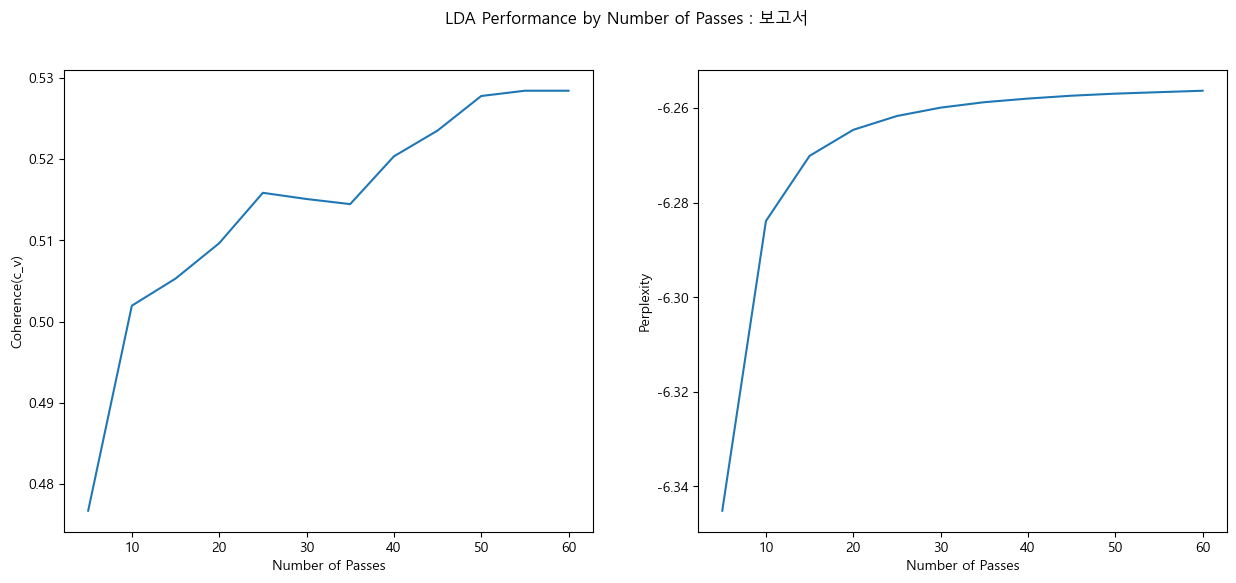

In [29]:
result_show= result.set_index('Number of passes')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
result_show['Coherence'].plot(ax=axes[0])
result_show['Perplexity'].plot(ax=axes[1])

axes[0].set_ylabel('Coherence(c_v)')
axes[1].set_ylabel('Perplexity')

axes[0].set_xlabel('Number of Passes')
axes[1].set_xlabel('Number of Passes')
fig.suptitle('LDA Performance by Number of Passes : 보고서')
fig.savefig('보고서_학습수_03_20.png')
plt.show()


##### 3.1.3 최적의 토픽 개수 탐색

In [25]:
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
import numpy as np

lda_para_model_n = []

for n in tqdm(range(5, 31)):
    lda_model = LdaMulticore(corpus=bow_gensim_para,
                             id2word=dict_gensim_para,
                             chunksize=2000,
                             eta='auto',
                             num_topics = n,
                             passes =25,
                             eval_every=None,
                             random_state=42)
    
    lda_coherence = CoherenceModel(model = lda_model,
                                   texts=gensim_paragraphs,
                                   dictionary=dict_gensim_para,
                                   coherence='c_v')

    lda_perplexity = lda_model.log_perplexity(bow_gensim_para)
    # lda_perplexity = np.exp(-1*lda_model.log_perplexity(bow_gensim_para))
    
    lda_para_model_n.append((n, lda_coherence.get_coherence(), lda_perplexity))
                            
    
    print(lda_perplexity)
    print(lda_coherence.get_coherence())
    print('\n\n')

result = pd.DataFrame(lda_para_model_n)

  4%|███▏                                                                              | 1/26 [01:56<48:35, 116.60s/it]

-7.650619231180872
0.47846206473060693





  8%|██████▎                                                                           | 2/26 [03:53<46:38, 116.61s/it]

-7.622688425116227
0.5184523954454369





 12%|█████████▍                                                                        | 3/26 [05:50<44:44, 116.74s/it]

-7.598538116385223
0.5216687062021748





 15%|████████████▌                                                                     | 4/26 [07:47<42:56, 117.13s/it]

-7.571278874903624
0.5453136607703566





 19%|███████████████▊                                                                  | 5/26 [09:47<41:21, 118.16s/it]

-7.558870882498922
0.5545142048443412





 23%|██████████████████▉                                                               | 6/26 [11:48<39:37, 118.86s/it]

-7.5436640613753125
0.5480766973892133





 27%|██████████████████████                                                            | 7/26 [13:49<37:56, 119.81s/it]

-7.527711336622923
0.5570299119258678





 31%|█████████████████████████▏                                                        | 8/26 [15:53<36:17, 120.95s/it]

-7.518881281002003
0.543570270850168



-7.510208914128797
0.566557984637372





 38%|███████████████████████████████▏                                                 | 10/26 [20:13<33:34, 125.88s/it]

-7.499061515552072
0.569782277963467



-7.4827095509033335


 42%|██████████████████████████████████▎                                              | 11/26 [22:25<31:52, 127.52s/it]

0.5738776992331662



-7.469749965158934


 46%|█████████████████████████████████████▍                                           | 12/26 [24:37<30:05, 128.95s/it]

0.5711801714304736



-7.461049153547519


 50%|████████████████████████████████████████▌                                        | 13/26 [26:54<28:28, 131.41s/it]

0.5659207753120661



-7.452284330511761


 54%|███████████████████████████████████████████▌                                     | 14/26 [29:15<26:51, 134.32s/it]

0.5688705974395726



-7.443094326136057


 58%|██████████████████████████████████████████████▋                                  | 15/26 [31:40<25:13, 137.59s/it]

0.5686718105484777



-7.4425300474595995


 62%|█████████████████████████████████████████████████▊                               | 16/26 [34:07<23:24, 140.50s/it]

0.5573810279865808



-7.436986946924405


 65%|████████████████████████████████████████████████████▉                            | 17/26 [36:39<21:34, 143.89s/it]

0.5655281150956727



-7.428558917573179


 69%|████████████████████████████████████████████████████████                         | 18/26 [39:16<19:41, 147.73s/it]

0.5710582095819411



-7.430921045172794


 73%|███████████████████████████████████████████████████████████▏                     | 19/26 [41:57<17:41, 151.67s/it]

0.568633212402221



-7.42244582852813


 77%|██████████████████████████████████████████████████████████████▎                  | 20/26 [44:40<15:31, 155.19s/it]

0.5682854192797381



-7.417051872234541


 81%|█████████████████████████████████████████████████████████████████▍               | 21/26 [47:26<13:12, 158.45s/it]

0.575608373060559



-7.411929358459306


 85%|████████████████████████████████████████████████████████████████████▌            | 22/26 [50:14<10:45, 161.36s/it]

0.5639221995542467



-7.409845801270235


 88%|███████████████████████████████████████████████████████████████████████▋         | 23/26 [53:09<08:16, 165.44s/it]

0.5780415078250707



-7.410679297579393


 92%|██████████████████████████████████████████████████████████████████████████▊      | 24/26 [55:54<05:30, 165.29s/it]

0.5717889598961596



-7.407233228573548


 96%|█████████████████████████████████████████████████████████████████████████████▉   | 25/26 [58:48<02:47, 167.75s/it]

0.5768749258872513



-7.4048061471953135


100%|███████████████████████████████████████████████████████████████████████████████| 26/26 [1:01:44<00:00, 142.46s/it]

0.5649238883573442





In [26]:
name = '소셜미디어_25_70'

In [27]:
result = pd.DataFrame(lda_para_model_n, columns=['Number of Topic', 'Coherence', 'Perplexity'],index=None)
result.to_excel('coh_perp_'+name+'.xlsx', encoding='utf8')

C:\Users\User\anaconda3\envs\paper\lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


C:\Users\User\AppData\Local\Temp\ipykernel_4476\2940796173.py:13: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.savefig('소셜_25_70.png')
C:\Users\User\AppData\Local\Temp\ipykernel_4476\2940796173.py:13: UserWarning: Glyph 49500 (\N{HANGUL SYLLABLE SYEOL}) missing from current font.
  fig.savefig('소셜_25_70.png')
C:\Users\User\AppData\Local\Temp\ipykernel_4476\2940796173.py:13: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.savefig('소셜_25_70.png')
C:\Users\User\AppData\Local\Temp\ipykernel_4476\2940796173.py:13: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from current font.
  fig.savefig('소셜_25_70.png')
C:\Users\User\AppData\Local\Temp\ipykernel_4476\2940796173.py:13: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.savefig('소셜_25_70.png')
C:\Users\User\anaconda3\envs\paper\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO

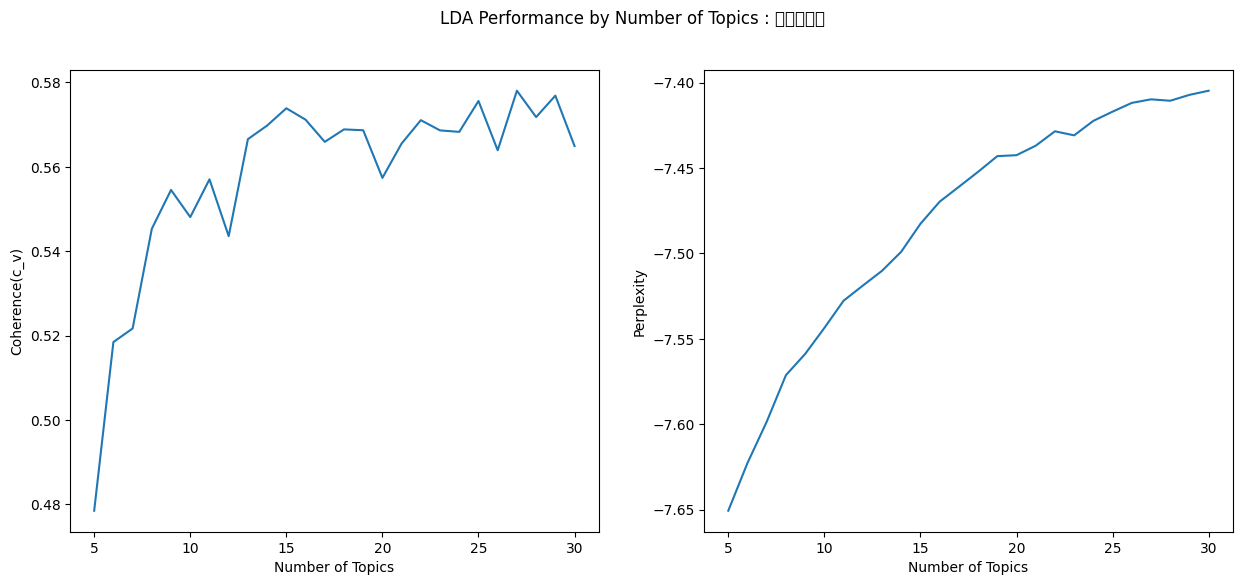

In [28]:
result_show= result.set_index('Number of Topic')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
result_show['Coherence'].plot(ax=axes[0])
result_show['Perplexity'].plot(ax=axes[1])

axes[0].set_ylabel('Coherence(c_v)')
axes[1].set_ylabel('Perplexity')

axes[0].set_xlabel('Number of Topics')
axes[1].set_xlabel('Number of Topics')
fig.suptitle('LDA Performance by Number of Topics : 소셜미디어')
fig.savefig('소셜_25_70.png')
plt.show()

In [46]:
result_show

,Coherence,Perplexity
Number of Topic,,
5,0.302850,-6.751830
6,0.291232,-6.749672
7,0.280426,-6.743693
8,0.318871,-6.737485
9,0.332240,-6.756479
10,0.323027,-6.753632
11,0.329179,-6.752068
12,0.349211,-6.734683
13,0.367168,-6.733791


##### 3.1.? LDA 시각화

In [51]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_gensim_para, bow_gensim_para, dict_gensim_para)
pyLDAvis.display(vis)

C:\Users\User\anaconda3\envs\jh2\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [52]:
#작업내용 저장
pyLDAvis.save_html(vis, '보고서_10_50.html')

### 4. 네트워크분석

In [19]:
"""
토픽별 상위단어 사용시

"""

# def get_top_words(model, num_words):
#     result = []
#     for i in range(model.num_topics):
#         words = model.show_topic(i, num_words)
#         result.append([word[0] for word in words])
    
#     # 리스트 병합
#     result = sum(result, [])
#     return result


# word_list = get_top_words(lda_gensim_para, 5)
# word_list

In [259]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel

"""

네트워크 분석을 위한 tf-idf 상위 n개 단어 list 반환

Parameter
----------
num_words: int
    상위 단어 출력을 위한 개수 설정

filters: Bool
    filter_extremes 적용시 True 설정. 세부 param 받을 수 있게 수정 필요

Returns
----------
word_list: list 
    전체 문서 내 단어 tf-idf 합산값 상위 n개 단어 리스트
"""

def get_top_words(num_words, filters=False):
    
    # 토큰화된 자료를 불러와 딕셔너리 생성
    gensim_paragraphs = df['tokens']
    dict_gensim_para = Dictionary(gensim_paragraphs)

    # 문서의 빈도수 및 등장 문서 개수 설정
    if filters:
        dict_gensim_para.filter_extremes(no_below=20, no_above=0.6)

    ## 사전 index 확인
    # dict_gensim_para.token2id

    # corpus(= BOW)
    bow_gensim_para = [dict_gensim_para.doc2bow(paragraph) for paragraph in gensim_paragraphs]
    # bow_gensim_para


    #TF-IDF 생성
    tfid_gensim_para = TfidfModel(bow_gensim_para)           # 가방 모델
    vectors_gensim_para = tfid_gensim_para[bow_gensim_para]  # 가중치
    
    
    word_tfidf_sum = pd.Series(index=dict_gensim_para.token2id.keys())
    

    
    # 단어별 tf-idf 가중치 합산
    for i, doc in enumerate(vectors_gensim_para):

        for word_id, value in doc:
            word = dict_gensim_para[word_id]

            if pd.isna(word_tfidf_sum[word]):
                word_tfidf_sum[word] = value
            else:
                word_tfidf_sum[word] += value
                
    
    df_tfidf = word_tfidf_sum.to_frame(name='tfidf_sum')

    # index 재설정
    df_tfidf = df_tfidf.reset_index()
    # df_tfidf = df_tfidf.rename(columns={'index': 'word'})   


    df_tfidf.columns = ['word', 'tfidf_sum']
    df_tfidf = df_tfidf.sort_values('tfidf_sum', ascending=False)
    df_tfidf = df_tfidf.head(num_words)
    
    word_list = df_tfidf['word'].values.tolist()
    
    return word_list

    

#### 4.1. 분석을 위한 단어 리스트 생성

In [ ]:
# 네트워크 분석을 위한 tf-idf 상위 100개 단어 설정

word_list = get_top_words(50)
word_list2 = get_top_words(50, filters=True)

print(len(word_list))

print(word_list)
print(word_list2)

In [139]:
# 토픽모델링 결과를 통해 도출한 토픽별 5개 키워드(사용x)

word_list = ['에너지', '배출', '온실가스', '감축', '친환경',
             '환경', '물질', '폐기물', '사용', '활용',
             '사회', '경영', '활동', '가치', '이해관계자',
             '교육', '임직원', '운영', '지원', '역량',
             '고객', '품질', '서비스', '금융', '개발',
             '관리', '리스크', '인권', '평가', '체계',
             '윤리', '협력사', '거래', '공정', '준법',
             '이사회', '위원회', '사외이사', '주주', '이사',
             '안전', '보건', '예방', '실시', '점검',
             '정보', '보안', '정보보호', '개인', '시스템']

#### 4.2. Node 생성

In [271]:
import networkx as nx

G = nx.Graph()   # undirected graph 생성
# G = nx.DiGraph()   # directed graph 생성
G.clear()
G.add_nodes_from(word_list)   # node 생성 (tf-idf 상위 100개 단어)

print(G.nodes()) # 노드
print(G.edges()) # 엣지(설정 x 상태)

['안전', '사회', '경영', '환경', '리스크', '윤리', '관리', '인권', '고객', '교육', '협력사', '보건', '임직원', '위원회', '평가', '체계', '배출', '친환경', '지원', '대응', '활동', '에너지', '사업', '품질', '정보', '기후변화', '제품', '온실가스', '운영', '지속', '강화', '사외이사', '시스템', '가치', '정보보호', '이해관계자', '보안', '추진', '성장', '목표', '주주', '전략', '문화', '공정', '기술', '노력', '구축', '조직', '개선', '공헌']
[]


#### 4.3. Edge 생성을 위한 텍스트 리스트

In [ ]:
# (1) '문단'별 연결관계 파악을 위한 text_list
# text_list = df['text'].tolist()
# text_list[:4]

In [282]:
# (2) '문장'별 연결관계 파악을 위한 text_list
df_edge = open_file(path_list[8], datatype='docx', report_sentence=True)
text_list = df_edge['text'].tolist()
text_list[:4]

['환경 변화에 대응하기 위해 KT는 기업 사용 전력량의 100%를 재생 에너지로 충당하는 RE100 캠페인에 가입하였으며, 2050 탄소 중립 선언 등 에너지 효율화를 통한 Net Zero 달성을 목표로 지속 노력하고 있습니다. 또한 AI를 활용한 에너지 절감 기술 개발 등 환경 경영에 관한 기업의 책임을 다하고 있습니다.',
 '임직원이 직접 참여하는 사랑의 봉사단과 청각 장애인들을 돕는 소리찾기 사회 공헌도 진정성과 꾸준함을 갖고 20년 이상 지속하고 있으며, 교육 격차 해소를 위한 비대면 학습 멘토링 프로그램 ‘랜선야학’ 및 청년들에게 AI와 디지털전환 실무 교육을 무상으로 제공하는 ‘에이블 스쿨’ 등을 통해 혁신 기술을 통한 사회적 문제 해결에도 많은 노력을 기울이고 있습니다.',
 '더불어 KT는 독립적인 이사회를 중심으로 주주 및 이해관계자와의 소통을 활성화하고, 내부통제 리스크 점검 활동 강화 등을 통해 보다 단단한 지배구조 구축 및 투명성 강화에 주력하고 있습니다. 또한 주주 환원 정책을 바탕으로 성장의 가치를 주주와 함께 공유 할 수 있도록 지속 노력하고 있습니다. 이러한 노력은 한국기업지배구조원 (KCGS) ESG평가 중, 특히 지배구조 부문에서는 2021년 최우수 기업으로 선정되는 결과로 이어졌습니다.',
 '앞으로도 KT는 DIGICO 기술을 기반으로 환경과 사회문제 해결에 앞장서서 사회에 공헌할 수 있는 방법을 끊임없이 고민하며 더 나은 미래를 실현하기 위해 최선의 노력을 다하겠습니다.']

#### 4.4. Edge 생성

In [272]:
import itertools


for sentence in text_list:  # 각 문장을 element로 담고 있는 list
    
    
    tokenized_words = []
    selected_words = []
    
    preprocessed_word = analyzer_pos(sentence, custom_dict=custom_dict)
    
    if len(preprocessed_word) == 0:
        continue
    
    
    # 토큰 추가
    for word in preprocessed_word:
        tokenized_words.append(word)
    
    
    for word in tokenized_words:
        if word in word_list:
            selected_words.append(word)
            
    selected_words = set(selected_words)   # 중복을 제거하기 위해 set(집합자료형)으로 변환
    

    for pair in list(itertools.combinations(list(selected_words), 2)):  
            
        if pair in G.edges(): 
             weight = G[pair[0]][pair[1]]['weight']
             weight += 1
             G[pair[0]][pair[1]]['weight'] = weight     
        else:
            G.add_edge(pair[0], pair[1], weight=1)
    
    

threshold = 100 #삭제를 위한 임계값 설정
edges_to_remove = []

for u, v, weight in G.edges(data='weight'):
    if weight < threshold:
        edges_to_remove.append((u, v))

G.remove_edges_from(edges_to_remove)


# 생성된 edge 확인
# nx.get_edge_attributes(G, 'weight')

####  4.5. 네트워크 시각화

C:\Users\User\anaconda3\envs\jh2\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


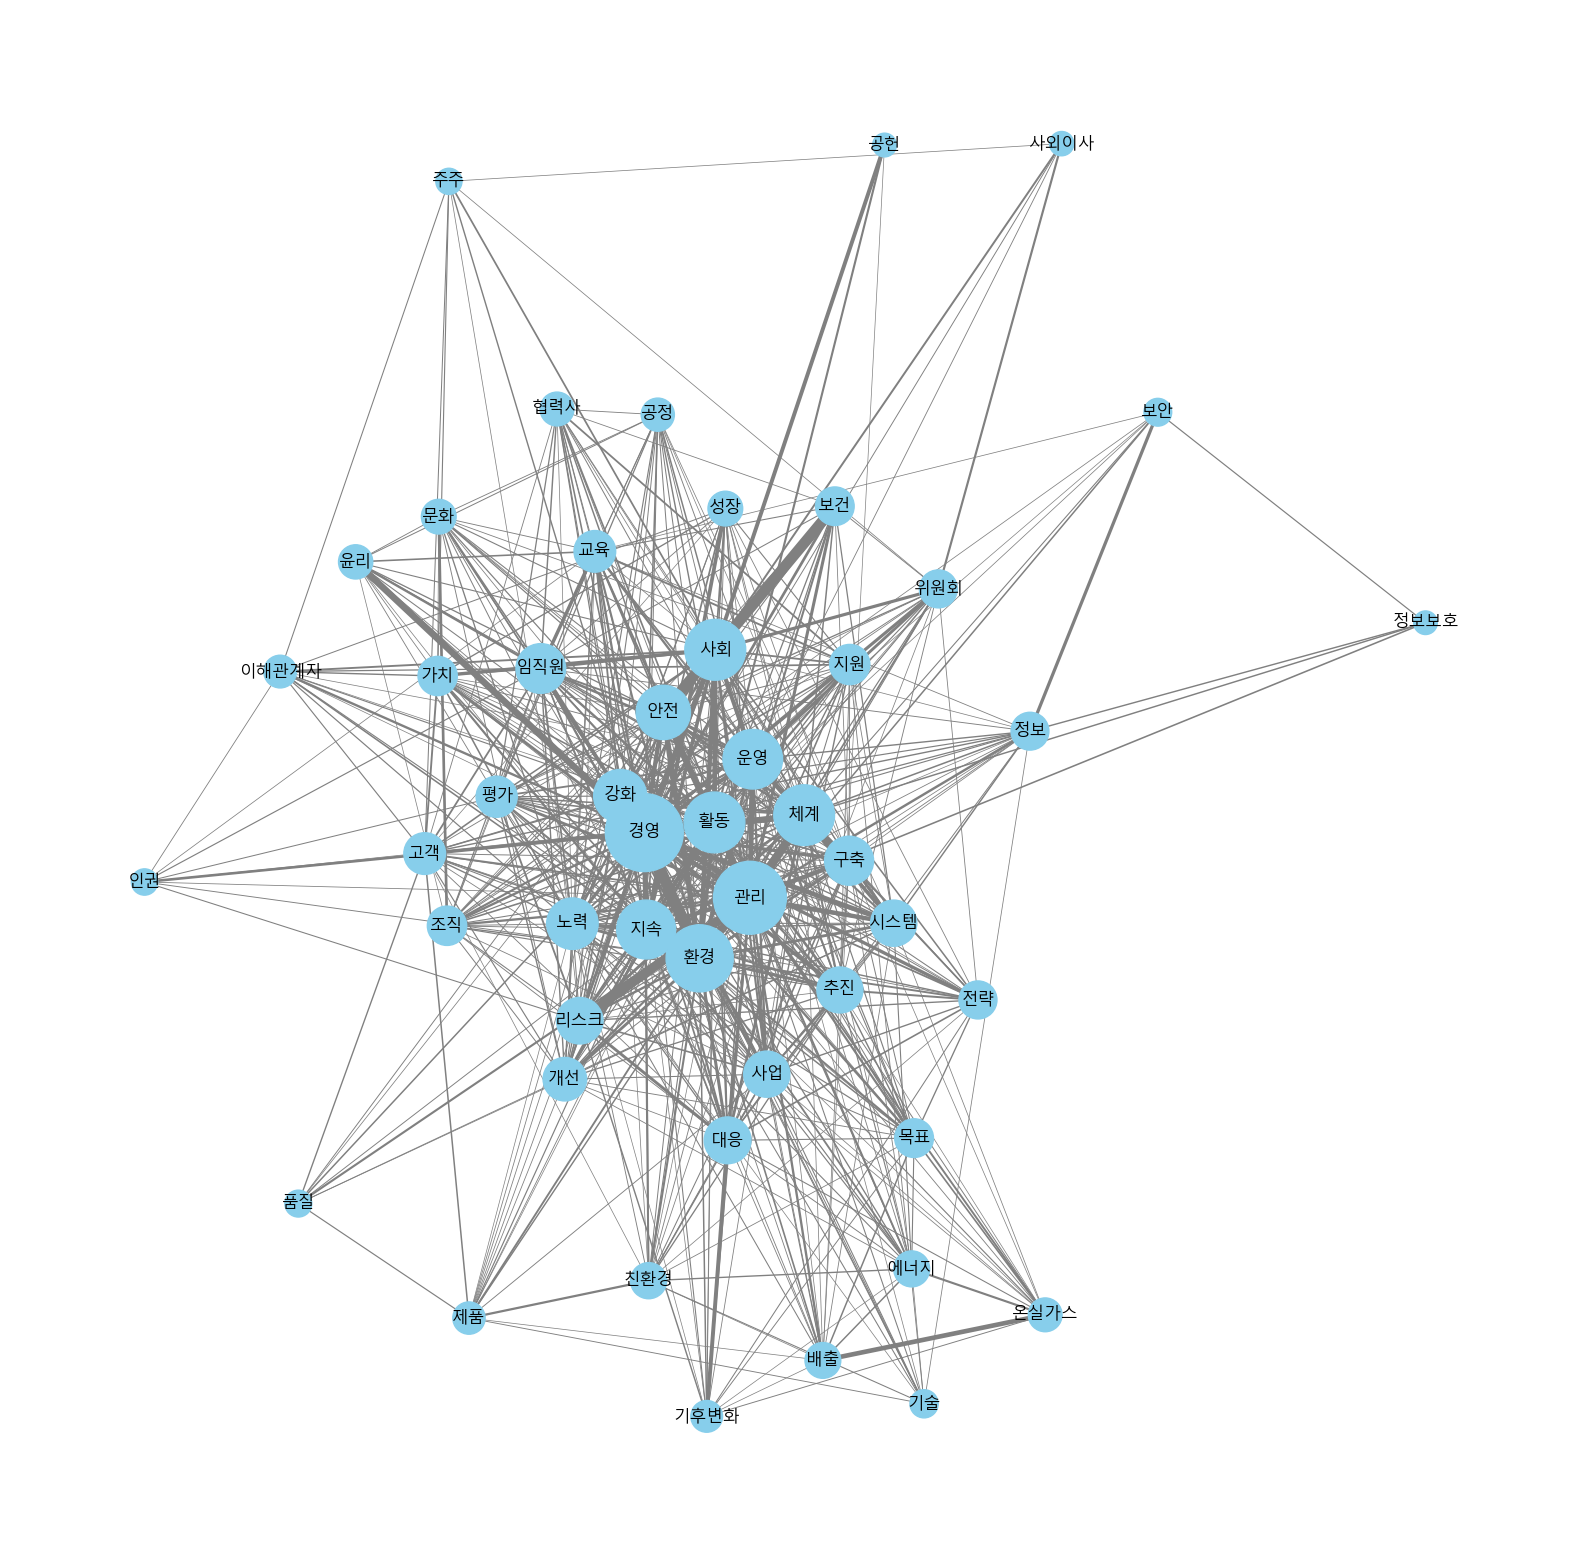

In [286]:
import matplotlib.pyplot as plt
import math
from matplotlib import font_manager as fm

## 한글 시각화용 폰트 설정
path = 'c:/Windows/Fonts/malgun.ttf' 
font_name = fm.FontProperties(fname=path).get_name()

## 노드의 degree에 따라 color 다르게 설정하기
# color_map = []
# for node in G:
#     if G.degree(node) >= 15:   # 중요한 노드 (degree가 15 이상)
#         color_map.append('pink') 
#     else: 
#         color_map.append('beige')    


pr = nx.pagerank(G)
edge_weight = [ w*0.005  for w in nx.get_edge_attributes(G,'weight').values()]
plt.figure(figsize=(20, 20))

# pos = nx.random_layout(G)  # random layout 사용
# pos = nx.fruchterman_reingold_layout(G) # fruchterman_reingold layout 사용
pos = nx.spring_layout(G, k=1, iterations=50, scale=1)  # spring layout 사용
# pos = nx.circular_layout(G)
# pos = nx.kamada_kawai_layout(G)


nx.draw_networkx(G,
                 pos,
                 node_color='skyblue',
                 edge_color='grey',
                 font_family=font_name,
                 width=edge_weight,                           # weight에 따른 edge width 설정
                 node_size=[50000*v for v in pr.values()])  # pagerank에 기반한 노드 크기 설정

nx.write_graphml(G, 'graph.graphml')
plt.axis('off') # turn off axis 
plt.show()


In [ ]:
def draw_graph3(networkx_graph,notebook=True,output_filename='graph.html',show_buttons=True,only_physics_buttons=False,
                height=None,width=None,bgcolor=None,font_color=None,pyvis_options=None):
    """
    This function accepts a networkx graph object,
    converts it to a pyvis network object preserving its node and edge attributes,
    and both returns and saves a dynamic network visualization.
    Valid node attributes include:
        "size", "value", "title", "x", "y", "label", "color".
        (For more info: https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.network.Network.add_node)
    Valid edge attributes include:
        "arrowStrikethrough", "hidden", "physics", "title", "value", "width"
        (For more info: https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.network.Network.add_edge)
    Args:
        networkx_graph: The graph to convert and display
        notebook: Display in Jupyter?
        output_filename: Where to save the converted network
        show_buttons: Show buttons in saved version of network?
        only_physics_buttons: Show only buttons controlling physics of network?
        height: height in px or %, e.g, "750px" or "100%
        width: width in px or %, e.g, "750px" or "100%
        bgcolor: background color, e.g., "black" or "#222222"
        font_color: font color,  e.g., "black" or "#222222"
        pyvis_options: provide pyvis-specific options (https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.options.Options.set)
    """

    # import
    from pyvis import network as net

    # make a pyvis network
    network_class_parameters = {"notebook": notebook, "height": height, "width": width, "bgcolor": bgcolor, "font_color": font_color}
    pyvis_graph = net.Network(**{parameter_name: parameter_value for parameter_name, parameter_value in network_class_parameters.items() if parameter_value})

    # for each node and its attributes in the networkx graph
    for node,node_attrs in networkx_graph.nodes(data=True):
        pyvis_graph.add_node(node,**node_attrs)

    # for each edge and its attributes in the networkx graph
    for source,target,edge_attrs in networkx_graph.edges(data=True):
        # if value/width not specified directly, and weight is specified, set 'value' to 'weight'
        if not 'value' in edge_attrs and not 'width' in edge_attrs and 'weight' in edge_attrs:
            # place at key 'value' the weight of the edge
            edge_attrs['value']=edge_attrs['weight']
        # add the edge
        pyvis_graph.add_edge(source,target,**edge_attrs)

    # turn buttons on
    if show_buttons:
        if only_physics_buttons:
            pyvis_graph.show_buttons(filter_=['physics'])
        else:
            pyvis_graph.show_buttons()

    # pyvis-specific options
    if pyvis_options:
        pyvis_graph.set_options(pyvis_options)

    # return and also save
    return pyvis_graph.show(output_filename)


##
# For example:
##

# make a new neworkx network
draw_graph3(G)

####. 4.6 중심성 계산

In [216]:
import operator

dgr = nx.degree_centrality(G)         # 연결중심성
btw = nx.betweenness_centrality(G)    # 매개중심성
cln = nx.closeness_centrality(G)      # 근접중심성
egv = nx.eigenvector_centrality(G)    # 아이겐벡터 중심성
pr = nx.pagerank(G)


# 중심성 정렬(내림차순)  -------------------------------------------------------//필요시
sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cln = sorted(cln.items(), key=operator.itemgetter(1), reverse=True)
sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)
sorted_pr = sorted(pr.items(), key=operator.itemgetter(1), reverse=True)

# df생성을 위한 Series 생성
dgr_series = pd.Series(dgr, name='degree')
btw_series = pd.Series(btw, name='betweenness')
cln_series = pd.Series(cln, name='closeness')
egv_series = pd.Series(egv, name='eigenvector')
pr_series = pd.Series(pr, name='pagerank')

df_cent = pd.concat([dgr_series, btw_series, cln_series, egv_series, pr_series], axis=1)
df_cent = df_cent.sort_index()
df_cent

C:\Users\User\anaconda3\envs\jh2\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


,degree,betweenness,closeness,eigenvector,pagerank
가치,0.448980,0.004180,0.644737,0.124144,0.018251
강화,0.795918,0.023293,0.830508,0.194863,0.030358
개선,0.591837,0.006141,0.710145,0.161739,0.022829
경영,0.938776,0.057507,0.942308,0.213016,0.036048
고객,0.551020,0.009453,0.690141,0.145476,0.021884
공정,0.387755,0.000665,0.620253,0.114202,0.015833
공헌,0.061224,0.000000,0.500000,0.019558,0.005031
관리,0.938776,0.060071,0.942308,0.213037,0.036187
교육,0.530612,0.007154,0.680556,0.137768,0.021209
구축,0.734694,0.012973,0.790323,0.188098,0.027780
